In [2]:
import os
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

--------------------------------------------------------------------------------
EEG_S01
Delta
0 xdawn
              precision    recall  f1-score   support

           1       0.83      0.77      0.80       504
           2       0.96      0.98      0.97      3220

    accuracy                           0.95      3724
   macro avg       0.90      0.87      0.89      3724
weighted avg       0.95      0.95      0.95      3724



/home/zcc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


--------------------------------------------------------------------------------
EEG_S01
Theta
0 xdawn
              precision    recall  f1-score   support

           1       0.67      0.60      0.63       504
           2       0.94      0.95      0.95      3220

    accuracy                           0.91      3724
   macro avg       0.80      0.78      0.79      3724
weighted avg       0.90      0.91      0.90      3724



KeyError: 'Theta'

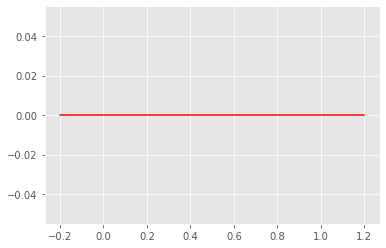

In [8]:
plt.style.use('ggplot')

color_freq = dict(
    Delta = 'r',
    Delta0 = 'g'
)
# for regexp in ['MEG_S01', 'MEG_S02', 'EEG_S01', 'EEG_S02', 'EEG_S03', 'EEG_S04']:
for regexp in ['EEG_S01']:  # , 'EEG_S02', 'EEG_S03', 'EEG_S04', 'EEG_S06', 'EEG_S07', 'EEG_S09']:
    df = pd.read_json('MVPA_predicts_{}.json'.format(regexp))

    for freq in df.columns:
        print('-' * 80)
        print(regexp)
        print(freq)
        for idx in df[freq].index:
            x = df[freq][idx]
            name = x[0]
            y_true = x[1]['y_true']
            y_pred = x[1]['y_predict']
            y_time_pred = np.array(x[1]['y_time_predict'])
            times = x[1]['times']
            print(idx, name)

             # All time report
            print(sklearn.metrics.classification_report(y_pred=y_pred, y_true=y_true))
            # Window time report
            scores = np.zeros(y_time_pred.shape[1])
            for j, y_pred in enumerate(y_time_pred.transpose()):
                scores[j] = sklearn.metrics.precision_score(y_pred=y_pred, y_true=y_true, average='weighted')
            plt.plot(times, scores, color_freq[freq], label='{}, {}, {}'.format(regexp, name, freq))
plt.legend(loc='right', bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()